In [18]:
0# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


In [20]:
# Step 2: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [21]:
# Step 3: Binary Classification (use only two classes)
X = X[y != 2]          # Remove the third class
y = y[y != 2]          # Keep only first two classes


In [29]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
# Step 5: Standardization (optional but useful for scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
# Step 2: Train the Decision Tree Model
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# Initialize and train model
#model = DecisionTreeClassifier(random_state=42)
#model.fit(X_train, y_train)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Step 3: Predictions
y_pred = model.predict(X_test)

# Step 4: Model Evaluation
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [34]:
print("Accuracy:", acc)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[20  0]
 [ 0 20]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



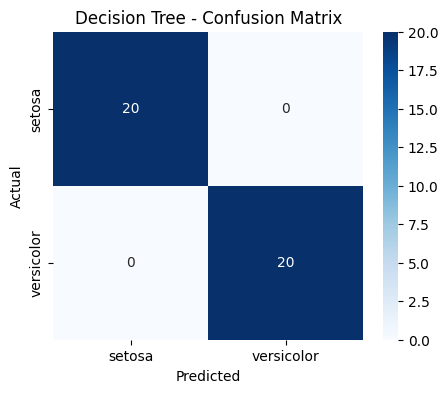

In [35]:
# Step 5: Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names[:2],
            yticklabels=iris.target_names[:2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()
